In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [76]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [77]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
df.shape

(42000, 785)

In [79]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
40863,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
import matplotlib.pyplot as plt

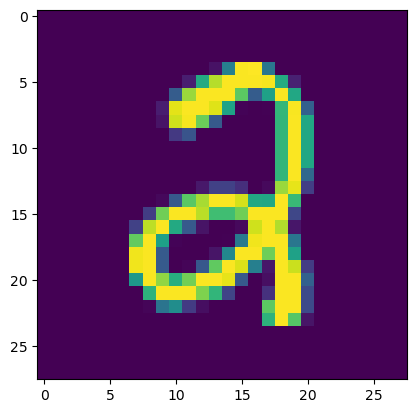

In [81]:
plt.imshow(df.iloc[39871,1:].values.reshape(28,28))

In [82]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [83]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)


In [84]:
X_train.shape

(33600, 784)

In [85]:
from sklearn.neighbors import KNeighborsClassifier

In [86]:
knn = KNeighborsClassifier()

In [87]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [88]:
import time
start = time.time()
y_pred = knn.predict(X_test)
print(time.time()-start)

11.523046016693115


In [89]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [91]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)

In [113]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [114]:
X_train_trf.shape

(33600, 784)

In [115]:
knn = KNeighborsClassifier()

In [116]:
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [117]:
y_pred = knn.predict(X_test_trf)

In [118]:
accuracy_score(y_test,y_pred)

0.9391666666666667

* When pca was not used accuracy was 0.9648809523809524
* When dimension was reduced to 200 from 784 0.9391666666666667

In [121]:
for i in range(1,i):
i=2pca = PCA(n_components=i)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)
print(f"for {i} features accuracy score = {accuracy_score(y_test,y_pred)}")

for 2 features accuracy score = 0.3236904761904762


In [123]:
# TRANSFORMING TO A 2D COORDINATE SYSTEM
pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [124]:
X_test_trf

array([[-5.00669904, -2.63024393],
       [-7.75779745, -1.47422004],
       [-7.47284834,  1.61830905],
       ...,
       [ 2.40771983, -1.54994266],
       [10.55730625, -2.46744245],
       [-3.42369567,  5.09416519]])

In [130]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence = px.colors.qualitative.G10
                 )
fig.show()

In [131]:
# TRANSFORMING TO A 3D COORDINATE SYSTEM
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [132]:
X_test_trf

array([[-5.00669979, -2.63019131,  2.70937149],
       [-7.75779827, -1.47421428,  2.83173747],
       [-7.47285449,  1.61838402, -5.40361222],
       ...,
       [ 2.40772245, -1.55010381,  8.9851264 ],
       [10.55730737, -2.46750699, -6.50193373],
       [-3.42369539,  5.09415241, -1.05538927]])

In [135]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                z=X_train_trf[:,2],
                 color=y_train_trf
                 )
fig.update_layout(margin=dict(l=20, r=20, t=20, b=20))
fig.show()

In [136]:
pca.explained_variance_
#eigen values

array([40.67111198, 29.17023399, 26.74459618])

In [139]:
# eigen vector
pca.components_

array([[ 4.91515092e-18,  2.72744696e-19,  1.86701442e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.60045378e-17, -1.07008220e-17,  1.17292125e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-9.41309234e-17,  4.08090275e-17,  4.67341065e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [140]:

pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [143]:
pca.explained_variance_.shape

(784,)

In [144]:
pca.components_.shape

(784, 784)

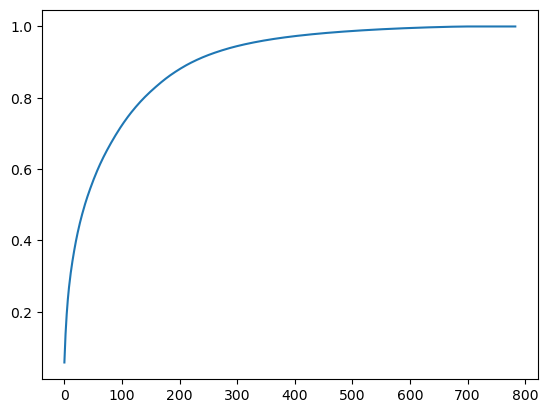

In [146]:
# finding optimal number of principle components
# find the eigen value that will expplain upto 90 percent of variance
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 

Around 250 component 90 percent of variance was explained